Main figure of the Alborex Data paper in ESSD journal:         
positions of all the deployments (to keep it simple and clear).

In [35]:
import os
import glob
import json
import logging
import cmocean
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
import datetime, time, calendar
import matplotlib.text as text
from matplotlib.path import Path
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import alborexdata
import alborexpaths
from alborexpaths import coordinates1, coordinates2
from importlib import reload
reload(alborexpaths)

importing configuration from alborexpaths


<module 'alborexpaths' from '/home/ctroupin/Publis/AlborEx-Data-Python/python/alborexpaths.py'>

## Logger

In [2]:
logger = alborexdata.configure_logging("./logs/alborexFigure1.log")

### Figures

In [6]:
figname = os.path.join(alborexpaths.figdir, 'fig01')
figname0 = os.path.join(alborexpaths.figdir, 'fig00')

## Time interval for the drifters

In [7]:
drifterstart = datetime.datetime(2014, 5, 25, 0, 0, 0)
drifterend = datetime.datetime(2014, 6, 15, 0, 0, 0)

# Load data
## Coast

In [8]:
loncoast, latcoast = alborexdata.read_lonlat_coast(alborexpaths.coastfile)

## Ship

In [9]:
rv = alborexdata.Ship()
rv.get_from_netcdf(alborexpaths.rvfile)
rv.apply_qc()

## CTD

In [14]:
ctd = alborexdata.CTD()
ctd.get_from_netcdf(alborexpaths.ctdfile)
lonCTD1, latCTD1 = alborexdata.load_lonloat_ctdleg(alborexpaths.ctdlegs[0])

## Gliders

In [34]:
gliders = [alborexdata.Glider(), alborexdata.Glider()]
gliders[0].get_from_netcdf(alborexpaths.gliderfiles[0])
gliders[1].get_from_netcdf(alborexpaths.gliderfiles[1])

## Drifters

In [32]:
drifterlist = []
for drifterfile in alborexpaths.drifterfiles:
    drifter = alborexdata.Drifter()
    drifter.get_from_netcdf(drifterfile)
    drifterlist.append(drifter)

## Profilers

In [20]:
profilers = [alborexdata.Profiler(), alborexdata.Profiler(), alborexdata.Profiler()]

for p, pfile in zip(profilers, alborexpaths.profilerfiles):
    p.get_from_netcdf(pfile)

# Correction on the dates of the 3rd profiler:
for ii in range(0, len(profilers[2].dates)):
    profilers[2].dates[ii] = profilers[2].dates[ii].replace(year=2014)

Subsetting according to dates

In [23]:
profilers[0].select_dates(initialdate=datetime.datetime(2014, 5, 30, 8, 0),
                       finaldate=drifterend)
profilers[1].select_dates(initialdate=drifterstart,
                       finaldate=drifterend)
profilers[2].select_dates(initialdate=drifterstart,
                       finaldate=drifterend)

## SST
The files could not be added to the GitHub repos, but can be downloaded from [OceanColor](http://oceancolor.gsfc.nasa.gov/) website.      The URLs can be changed in the [configuration file](alborexconfig.json) if necessary.

In [25]:
for sstfile, sstremote in zip(alborexpaths.sstfiles, alborexpaths.sstremotefiles):
    if not(os.path.exists(sstfile)):
        logger.info("Downloading data file {}".format(os.path.basename(sstfile)))
        urllib.request.urlretrieve(sstremote, sstfile)
    else:
        logger.info("SST file {} already downloaded".format(os.path.basename(sstfile)))

2019-01-11 22:26:53,409 - alborex_logger - INFO - SST file A2014145125000.L2_LAC_SST.nc already downloaded
2019-01-11 22:26:53,418 - alborex_logger - INFO - SST file A2014150020500.L2_LAC_SST.nc already downloaded


In [28]:
lonsst, latsst, sst, sstqual, year, day, platform = alborexdata.load_sst_l2(alborexpaths.sstfiles[0])
# Make the SST when flag > 1
sst = np.ma.masked_where(sstqual > 1, sst)

## Front

In [29]:
frontcoords = alborexpaths.frontfile
f = alborexdata.Front()
f.get_from_file(frontcoords)
f.smooth()

# Main figure

In [31]:
m = Basemap(projection='merc', llcrnrlon=coordinates1[0], llcrnrlat=coordinates1[2],
            urcrnrlon=coordinates1[1], urcrnrlat=coordinates1[3],
            lat_ts=0.5 * (coordinates1[2] + coordinates1[3]), resolution='h')

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4771: RuntimeWarning: invalid value encountered in greater
  lonsin = np.where(lonsin > lon_0+180, lonsin-360 ,lonsin)
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4772: RuntimeWarning: invalid value encountered in less
  lonsin = np.where(lonsin < lon_0-180, lonsin+360 ,lonsin)
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4776: RuntimeWarning: invalid value encountered in greater_equal
  itemindex = len(lonsin)-np.where(londiff>=thresh)[0]


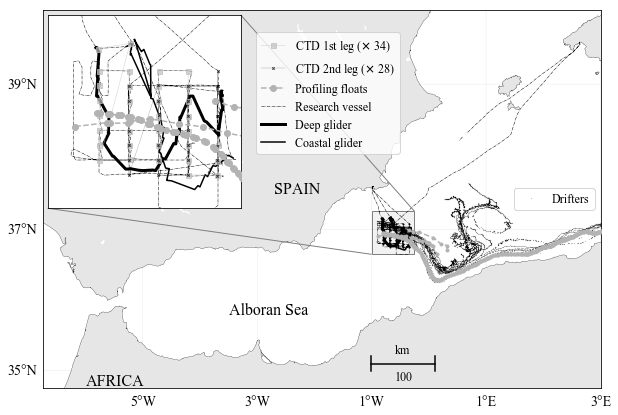

In [38]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
m.ax = ax

# Map scale
m.drawmapscale(-0.45, 35.1, -0.25, 35.1, 100, barstyle='simple', 
               units='km', fontsize=12, zorder=3)

# Labels
xa1, ya1 = m(-2.7, 37.5)
ax.annotate("SPAIN", xy=(xa1,ya1), xytext=(xa1,ya1),
            xycoords='data', textcoords='data', fontsize=16
            )
xa1, ya1 = m(-6, 34.8)
xa2, ya2 = m(-6, 34.8)
ax.annotate("AFRICA", xy=(xa1,ya1), xytext=(xa2,ya2),
            xycoords='data', textcoords='data', fontsize=16
            )
xa1, ya1 = m(-3.5, 35.8)
xa2, ya2 = m(-3.5, 35.8)
ax.annotate("Alboran Sea", xy=(xa1,ya1), xytext=(xa2,ya2),
            xycoords='data', textcoords='data', fontsize=16,
            zorder=7
            )
# Add drifter trajectories on map
for ii, drifter in enumerate(drifterlist):
        
    # Take only good time
    drifter.select_dates(initialdate=drifterstart, finaldate=drifterend)
    if ii == 0:
        m.plot(drifter.lon.compressed(), drifter.lat.compressed(), 
               'ko', ms=0.1, alpha=.85, zorder=5, latlon=True, label="Drifters")
    else:
        m.plot(drifter.lon.compressed(), drifter.lat.compressed(), 
               'ko', ms=0.1, alpha=.85, zorder=5, latlon=True)
        
    
# CTD
m.plot(ctd.lon, ctd.lat, 'ko', ms=1, zorder=6, latlon=True)

# Glider
llong1, llatg1 = m(gliders[0].lon.compressed(), gliders[0].lat.compressed())
llong2, llatg2 = m(gliders[1].lon.compressed(), gliders[1].lat.compressed())

m.plot(gliders[0].lon.compressed(), gliders[0].lat.compressed(), 
       '-', lw=3, color='k', zorder=3, latlon=True)
m.plot(gliders[1].lon.compressed(), gliders[1].lat.compressed(), 
       '-', lw=1.5, color='k', zorder=3, latlon=True)

# Profilers
lonp1, latp1 = m(profilers[0].lon, profilers[0].lat)
lonp2, latp2 = m(profilers[1].lon, profilers[1].lat)
lonp3, latp3 = m(profilers[2].lon, profilers[2].lat)

for p in profilers:
    m.plot(p.lon, p.lat, "o--", zorder=6,
       color=".7", latlon=True, ms=3)

# Ship trajectory
lonrv, latrv = m(rv.lon.compressed(), rv.lat.compressed())
m.plot(rv.lon, rv.lat, 'k-.', linewidth=.5, latlon=True)

# Coastline and continent
for i in range(0, len(loncoast)):
    m.plot(np.array(loncoast[i]), np.array(latcoast[i]), 
           color='k', linewidth=.25, latlon=True)

m.fillcontinents(ax=ax, color='0.9', zorder=2)
m.drawcountries(linewidth=.2, color="k")

# Add rectangle around study area
patch = alborexdata.create_rect_patch(coordinates2, m, color=".95")
ax.add_patch(patch)

# Plot inset with CTD and gliders
axins = zoomed_inset_axes(ax, 4.5, loc=2)
n1, n2 = m(coordinates2[0], coordinates2[2])
n3, n4 = m(coordinates2[1], coordinates2[3])
axins.set_xlim(n1, n3)
axins.set_ylim(n2, n4)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# Add gliders tracks and CTD casts
NN = 34

llon, llat = m(ctd.lon[:NN], ctd.lat[:NN])
axins.plot(llon, llat, 'ks-', lw=0.5, color=".75", ms=5, 
           zorder=4, label=r"CTD 1st leg ($\times$ 34)", alpha=.7)
llon, llat = m(ctd.lon[NN:], ctd.lat[NN:])
axins.plot(llon, llat, 'kx-', lw=0.2, ms=2.5, 
           zorder=4, label=r"CTD 2nd leg ($\times$ 28)",
           alpha=.7)

axins.plot(lonp1, latp1, "o--", zorder=6, color=".7", label="Profiling floats")
axins.plot(lonp2, latp2, "o--", zorder=6, color=".7")
axins.plot(lonp3, latp3, "o--", zorder=6, color=".7")
axins.plot(lonrv, latrv, 'k-.', linewidth=.5, label="Research vessel")
axins.plot(llong1, llatg1, '-', lw=3, color='k', zorder=3, label="Deep glider", )
axins.plot(llong2, llatg2, '-', lw=1.5, color='k', zorder=3, label="Coastal glider")
axins.legend(bbox_to_anchor=(1.05, .25), fontsize=12)

#axins.plot(londriftertotal / ndrifters, latdriftertotal / ndrifters, 'ko', ms=0.1,
#           label=r"Drifters ($\times$ 25)")
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
ax.legend(loc=7, fontsize=12)

alborexdata.add_map_grid(m, coordinates1, dlon=2., dlat=2.,
                         fontname='Times New Roman', fontsize=14, 
                         linewidth=0.2, zorder=1, color=".6")
#plt.savefig(figname, dpi=300, bbox_inches='tight', transparent=False,
#            edgecolor='white', pad_inches=0)
plt.show()
plt.close()

## Key figure for ESSD
Same but with SST and the front position

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4771: RuntimeWarning: invalid value encountered in greater
  lonsin = np.where(lonsin > lon_0+180, lonsin-360 ,lonsin)
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4772: RuntimeWarning: invalid value encountered in less
  lonsin = np.where(lonsin < lon_0-180, lonsin+360 ,lonsin)
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4776: RuntimeWarning: invalid value encountered in greater_equal
  itemindex = len(lonsin)-np.where(londiff>=thresh)[0]


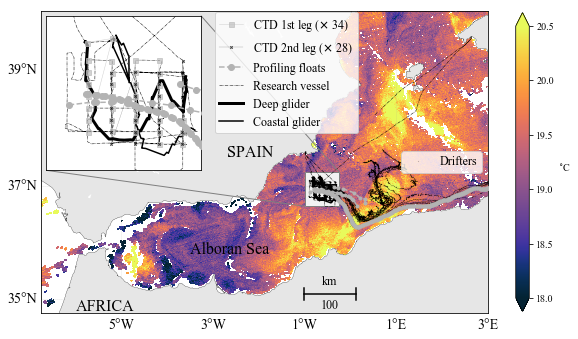

In [43]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
m.ax = ax

# Map scale
m.drawmapscale(-0.45, 35.1, -0.25, 35.1, 100, barstyle='simple', 
               units='km', fontsize=12, zorder=3)

pcm = m.pcolormesh(lonsst, latsst, sst, vmin=18., vmax=20.5, 
                   latlon=True, cmap=cmocean.cm.thermal)

cb = plt.colorbar(pcm, shrink=0.55, extend="both")
cb.set_label("$^{\circ}$C", rotation=0, ha='left')

# Labels
xa1, ya1 = m(-2.7, 37.5)
ax.annotate("SPAIN", xy=(xa1,ya1), xytext=(xa1,ya1),
            xycoords='data', textcoords='data', fontsize=16
            )
xa1, ya1 = m(-6, 34.8)
xa2, ya2 = m(-6, 34.8)
ax.annotate("AFRICA", xy=(xa1,ya1), xytext=(xa2,ya2),
            xycoords='data', textcoords='data', fontsize=16
            )
xa1, ya1 = m(-3.5, 35.8)
xa2, ya2 = m(-3.5, 35.8)
ax.annotate("Alboran Sea", xy=(xa1,ya1), xytext=(xa2,ya2),
            xycoords='data', textcoords='data', fontsize=16,
            zorder=7
            )
# Add drifter trajectories on map
for ii, drifter in enumerate(drifterlist):
        
    # Take only good time
    drifter.select_dates(initialdate=drifterstart, finaldate=drifterend)
    if ii == 0:
        m.plot(drifter.lon.compressed(), drifter.lat.compressed(), 
               'ko', ms=0.1, alpha=.85, zorder=5, latlon=True, label="Drifters")
    else:
        m.plot(drifter.lon.compressed(), drifter.lat.compressed(), 
               'ko', ms=0.1, alpha=.85, zorder=5, latlon=True)
        
    
# CTD
m.plot(ctd.lon, ctd.lat, 'ko', ms=1, zorder=6, latlon=True)

# Glider
llong1, llatg1 = m(gliders[0].lon.compressed(), gliders[0].lat.compressed())
llong2, llatg2 = m(gliders[1].lon.compressed(), gliders[1].lat.compressed())

m.plot(gliders[0].lon.compressed(), gliders[0].lat.compressed(), 
       '-', lw=3, color='k', zorder=3, latlon=True)
m.plot(gliders[1].lon.compressed(), gliders[1].lat.compressed(), 
       '-', lw=1.5, color='k', zorder=3, latlon=True)

# Profilers
lonp1, latp1 = m(profilers[0].lon, profilers[0].lat)
lonp2, latp2 = m(profilers[1].lon, profilers[1].lat)
lonp3, latp3 = m(profilers[2].lon, profilers[2].lat)

for p in profilers:
    m.plot(p.lon, p.lat, "o--", zorder=6,
       color=".7", latlon=True, ms=3)

# Ship trajectory
lonrv, latrv = m(rv.lon.compressed(), rv.lat.compressed())
m.plot(rv.lon, rv.lat, 'k-.', linewidth=.5, latlon=True)

# Coastline and continent
for i in range(0, len(loncoast)):
    m.plot(np.array(loncoast[i]), np.array(latcoast[i]), 
           color='k', linewidth=.25, latlon=True)

m.fillcontinents(ax=ax, color='0.9', zorder=2)
m.drawcountries(linewidth=.2, color="k")

# Add rectangle around study area
patch = alborexdata.create_rect_patch(coordinates2, m, color=".95")
ax.add_patch(patch)

# Plot inset with CTD and gliders
axins = zoomed_inset_axes(ax, 4.5, loc=2)
n1, n2 = m(coordinates2[0], coordinates2[2])
n3, n4 = m(coordinates2[1], coordinates2[3])
axins.set_xlim(n1, n3)
axins.set_ylim(n2, n4)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# Add gliders tracks and CTD casts
NN = 34

llon, llat = m(ctd.lon[:NN], ctd.lat[:NN])
axins.plot(llon, llat, 'ks-', lw=0.5, color=".75", ms=5, 
           zorder=4, label=r"CTD 1st leg ($\times$ 34)", alpha=.7)
llon, llat = m(ctd.lon[NN:], ctd.lat[NN:])
axins.plot(llon, llat, 'kx-', lw=0.2, ms=2.5, 
           zorder=4, label=r"CTD 2nd leg ($\times$ 28)",
           alpha=.7)

axins.plot(lonp1, latp1, "o--", zorder=6, color=".7", label="Profiling floats")
axins.plot(lonp2, latp2, "o--", zorder=6, color=".7")
axins.plot(lonp3, latp3, "o--", zorder=6, color=".7")
axins.plot(lonrv, latrv, 'k-.', linewidth=.5, label="Research vessel")
axins.plot(llong1, llatg1, '-', lw=3, color='k', zorder=3, label="Deep glider", )
axins.plot(llong2, llatg2, '-', lw=1.5, color='k', zorder=3, label="Coastal glider")
axins.legend(bbox_to_anchor=(1.05, .2), fontsize=12)

#axins.plot(londriftertotal / ndrifters, latdriftertotal / ndrifters, 'ko', ms=0.1,
#           label=r"Drifters ($\times$ 25)")
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
ax.legend(loc=7, fontsize=12)

alborexdata.add_map_grid(m, coordinates1, dlon=2., dlat=2.,
                         fontname='Times New Roman', fontsize=14, 
                         linewidth=0.2, zorder=1, color=".6")

plt.savefig(figname0, dpi=300, bbox_inches='tight', transparent=False,
            edgecolor='white', pad_inches=0)

plt.show()
plt.close()